In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Creating three sets of coordinates to create 3 blobs

In [4]:
centers1 = [[2, 2], [-2, -2], [2, -2]]
centers2 = [[5, 2], [-6, -4], [5, -5]]
centers3 = [[20, 12], [-25, -32], [22, -22]]

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

In [6]:
X1, y1 = make_blobs(
    n_samples=10000,
    centers=centers1,
    cluster_std=1,
    n_features=2,
    random_state=42)

In [7]:
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers2,
    cluster_std=1,
    n_features=2,
    random_state=42)

In [8]:
X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers3,
    cluster_std=1,
    n_features=2,
    random_state=42)

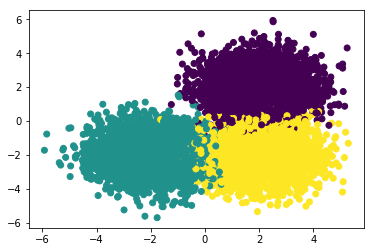

In [9]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.show()

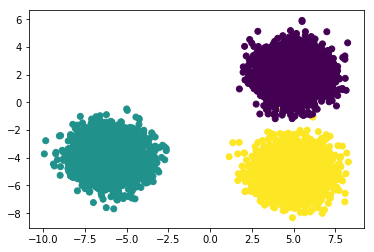

In [10]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

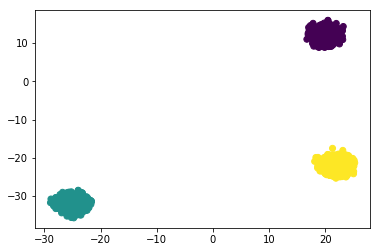

In [11]:
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.show()

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1,
    y1,
    test_size=0.3,
    random_state=42)

In [11]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.3,
    random_state=42)

In [12]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.3,
    random_state=42)

Mean shift

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import accuracy_score

Number of estimated clusters: 3


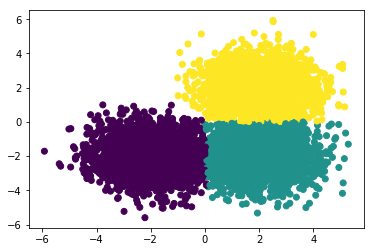

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0         1    51  2279
1      2302    47     4
2        64  2205    47
0.013571428571428571


In [19]:
bandwidth1 = estimate_bandwidth(X_train1, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms1 = MeanShift(bandwidth=bandwidth1, bin_seeding=True)
ms1.fit(X_train1)

# Extract cluster assignments for each data point.
labels1 = ms1.labels_

# Coordinates of the cluster centers.
cluster_centers1 = ms1.cluster_centers_

# Count our clusters.
n_clusters_1 = len(np.unique(labels1))

print("Number of estimated clusters: {}".format(n_clusters_1))

plt.scatter(X_train1[:, 0], X_train1[:, 1], c=labels1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,labels1))
print(accuracy_score(y_train1,labels1))

Number of estimated clusters: 3


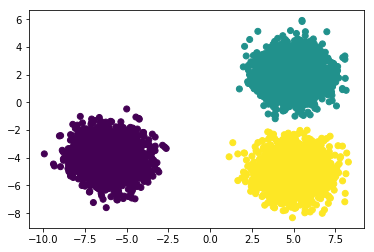

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0         0  2331     0
1      2353     0     0
2         0     1  2315
0.33071428571428574


In [20]:
bandwidth2 = estimate_bandwidth(X_train2, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms2.fit(X_train2)

# Extract cluster assignments for each data point.
labels2 = ms2.labels_

# Coordinates of the cluster centers.
cluster_centers2 = ms2.cluster_centers_

# Count our clusters.
n_clusters_2 = len(np.unique(labels2))

print("Number of estimated clusters: {}".format(n_clusters_2))

plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels2)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,labels2))
print(accuracy_score(y_train2,labels2))

Number of estimated clusters: 3


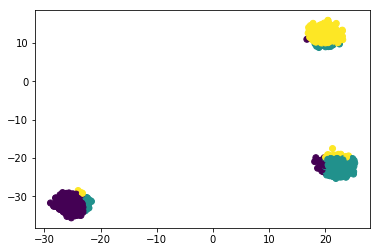

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0         1    51  2279
1      2302    47     4
2        64  2205    47
0.013571428571428571


In [21]:
bandwidth3 = estimate_bandwidth(X_train3, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms3 = MeanShift(bandwidth=bandwidth3, bin_seeding=True)
ms3.fit(X_train3)

# Extract cluster assignments for each data point.
labels3 = ms1.labels_

# Coordinates of the cluster centers.
cluster_centers3 = ms3.cluster_centers_

# Count our clusters.
n_clusters_3 = len(np.unique(labels3))

print("Number of estimated clusters: {}".format(n_clusters_3))

plt.scatter(X_train3[:, 0], X_train3[:, 1], c=labels3)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train3,labels3))
print(accuracy_score(y_train3,labels3))

Spectral clustering

In [22]:
from sklearn.cluster import SpectralClustering

In [23]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)

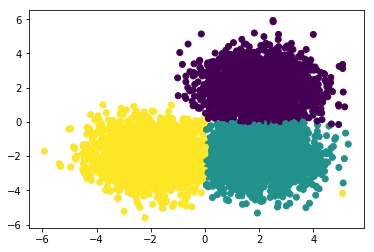

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0      2283    47     1
1         4    47  2302
2        51  2200    65
0.34214285714285714


In [24]:
#Predicted clusters.
predict1=sc.fit_predict(X_train1)

#Graph results.
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=predict1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,predict1))
print(accuracy_score(y_train1,predict1))

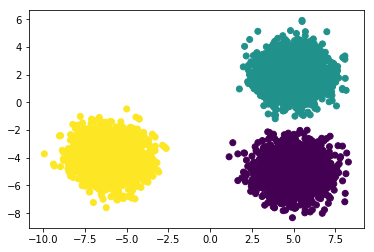

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0         0  2331     0
1         0     0  2353
2      2315     1     0
0.0


In [25]:
#Predicted clusters.
predict2=sc.fit_predict(X_train2)

#Graph results.
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict2)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,predict2))
print(accuracy_score(y_train2,predict2))

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


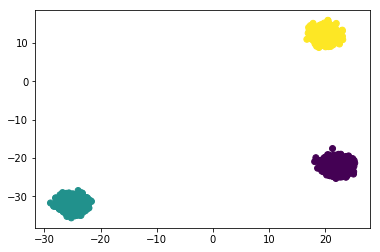

Comparing the assigned categories to the ones in the data:
col_0     0     1     2
row_0                  
0         0     0  2331
1         0  2353     0
2      2316     0     0
0.33614285714285713


In [26]:
#Predicted clusters.
predict3=sc.fit_predict(X_train3)

#Graph results.
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=predict3)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train3,predict3))
print(accuracy_score(y_train3,predict3))

Affinity propagation

In [27]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af1 = AffinityPropagation().fit(X_train1)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices1 = af1.cluster_centers_indices_
n_clusters1_ = len(cluster_centers_indices1)
labels1 = af1.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Kernel died...

K means

In [1]:
from sklearn.cluster import KMeans

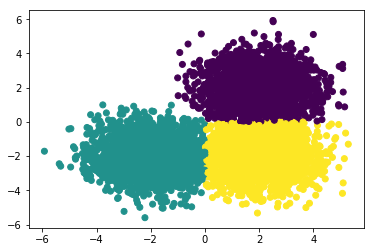

col_0     0     1     2
row_0                  
0      2279     1    51
1         4  2301    48
2        46    62  2208
0.9697142857142858


In [15]:
y_pred1 = KMeans(n_clusters=3, random_state=42).fit_predict(X_train1)
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_pred1)
plt.show()
print(pd.crosstab(y_train1,y_pred1))
print(accuracy_score(y_train1,y_pred1))

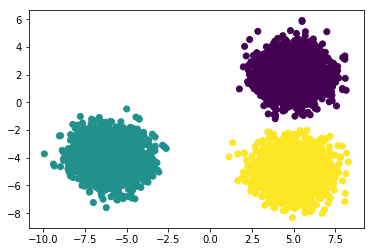

col_0     0     1     2
row_0                  
0      2331     0     0
1         0  2353     0
2         1     0  2315
0.9998571428571429


In [16]:
y_pred2 = KMeans(n_clusters=3, random_state=42).fit_predict(X_train2)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_pred2)
plt.show()
print(pd.crosstab(y_train2,y_pred2))
print(accuracy_score(y_train2,y_pred2))

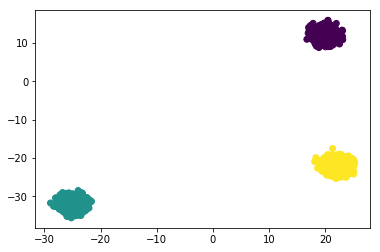

col_0     0     1     2
row_0                  
0      2331     0     0
1         0  2353     0
2         0     0  2316
1.0


In [17]:
y_pred3 = KMeans(n_clusters=3, random_state=42).fit_predict(X_train3)
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_pred3)
plt.show()
print(pd.crosstab(y_train3,y_pred3))
print(accuracy_score(y_train3,y_pred3))